In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import re

from insightface.app import FaceAnalysis
from sklearn.metrics import pairwise

In [3]:
app = FaceAnalysis(name="buffalo_sc", 
                   root="insightface_model",
                   providers=["CPUExecutionProviders"])

app.prepare(ctx_id=0, det_size=(640, 640), det_thresh=0.5)

c:\Users\Athif\OneDrive\Desktop\attendance-project\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CPUExecutionProviders' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


EP Error Unknown Provider Type: CPUExecutionProviders when using ['CPUExecutionProviders']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
EP Error Unknown Provider Type: CPUExecutionProviders when using ['CPUExecutionProviders']
Falling back to ['CPUExecutionProvider'] and retrying.
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [4]:
dir_list = os.listdir("./images")
print(dir_list)

['student-joe', 'student-jon', 'student-rob', 'teacher-martin', 'teacher-tyrion']


In [5]:
def clean_name(word):
    word = re.sub(r"[^a-zA-Z]", " ",  word)
    word = word.title()
    return word

In [6]:
person_info = []
for folder_name in dir_list:
    role, name = folder_name.split("-")
    name = clean_name(name)
    role = clean_name(role)
    # print(f"Role: {role} \t Name: {name}")

    img_files = os.listdir(f"./images/{folder_name}")
    for img in img_files:
        path = f"./images/{folder_name}/{img}"
        img_arr = cv2.imread(path)
        results = app.get(img_arr, max_num=1)

        if len(results) > 0:
            res = results[0]
            embedding = res["embedding"]

            person_info.append([name, role, embedding])
        

In [7]:
person_info

[['Joe',
  'Student',
  array([ 7.43379414e-01, -5.25995970e-01,  6.32884443e-01, -1.24196506e+00,
         -2.20475018e-01,  8.12119067e-01, -1.15428233e+00, -1.52210221e-02,
          3.46810269e+00, -2.33918691e+00, -1.66798270e+00,  8.77079606e-01,
          1.80874467e-02,  1.23686624e+00, -2.79842639e+00, -1.39629388e+00,
         -8.42707098e-01, -3.16891253e-01,  1.99579149e-01,  2.37756014e+00,
          7.97047436e-01,  5.23417532e-01, -4.68427598e-01,  2.67835438e-01,
          5.65023184e-01,  1.00522828e+00,  2.86058187e-02,  2.78623700e-01,
          2.75093985e+00, -2.40375310e-01,  1.58059978e+00, -8.96978498e-01,
         -4.58286762e-01,  2.00534120e-01,  2.49590397e+00,  1.33256102e+00,
          3.78767788e-01,  1.19971991e+00, -6.22886598e-01, -2.24105448e-01,
          4.23779696e-01,  4.78359193e-01,  1.37930393e-01, -1.28055406e+00,
         -8.23444247e-01, -1.33400306e-01, -5.68517566e-01, -9.79002833e-01,
          2.42946196e+00,  1.22211784e-01,  1.14531851

In [8]:
df = pd.DataFrame(person_info, columns=["name", "role", "embedding"])

In [8]:
df

,name,role,embedding
0,Joe,Student,"[0.7433794, -0.52599597, 0.63288444, -1.241965..."
1,Joe,Student,"[-0.6705178, -1.0788858, -1.156904, -1.6057901..."
2,Joe,Student,"[-0.14062944, -1.3130106, 0.66264147, 0.053164..."
3,Joe,Student,"[-1.1262792, -1.1930163, -0.5926257, -0.551641..."
4,Joe,Student,"[0.25712642, -1.267541, 0.084139764, -0.411764..."
5,Joe,Student,"[-2.0053103, -0.7248199, 2.7564719, -1.7607996..."
6,Joe,Student,"[0.16668518, -1.7802274, -0.14556298, -2.56176..."
7,Joe,Student,"[-2.1301966, -1.0258768, -0.4972496, -1.821450..."
8,Joe,Student,"[-0.6874978, -1.3496385, -0.22669765, -1.98991..."
9,Joe,Student,"[-1.7451499, -1.6675487, 0.10826075, -0.439916..."


In [9]:
df["embedding"][0]

array([ 7.43379414e-01, -5.25995970e-01,  6.32884443e-01, -1.24196506e+00,
       -2.20475018e-01,  8.12119067e-01, -1.15428233e+00, -1.52210221e-02,
        3.46810269e+00, -2.33918691e+00, -1.66798270e+00,  8.77079606e-01,
        1.80874467e-02,  1.23686624e+00, -2.79842639e+00, -1.39629388e+00,
       -8.42707098e-01, -3.16891253e-01,  1.99579149e-01,  2.37756014e+00,
        7.97047436e-01,  5.23417532e-01, -4.68427598e-01,  2.67835438e-01,
        5.65023184e-01,  1.00522828e+00,  2.86058187e-02,  2.78623700e-01,
        2.75093985e+00, -2.40375310e-01,  1.58059978e+00, -8.96978498e-01,
       -4.58286762e-01,  2.00534120e-01,  2.49590397e+00,  1.33256102e+00,
        3.78767788e-01,  1.19971991e+00, -6.22886598e-01, -2.24105448e-01,
        4.23779696e-01,  4.78359193e-01,  1.37930393e-01, -1.28055406e+00,
       -8.23444247e-01, -1.33400306e-01, -5.68517566e-01, -9.79002833e-01,
        2.42946196e+00,  1.22211784e-01,  1.14531851e+00, -2.40696818e-01,
        2.06158137e+00, -

In [10]:
img_test = cv2.imread("./test_images/jon2.jpg")
cv2.imshow("Jon Snow", img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
res_test = app.get(img_test, max_num=0)
res_test

[{'bbox': array([157.09955 ,  45.05633 , 203.95679 , 106.805725], dtype=float32),
  'kps': array([[171.19661 ,  69.82063 ],
         [192.70122 ,  68.830894],
         [183.78847 ,  82.246994],
         [175.04874 ,  93.3709  ],
         [190.54166 ,  92.53765 ]], dtype=float32),
  'det_score': 0.8113017,
  'embedding': array([-3.4778442 ,  0.6822691 , -0.68435365,  0.06216308, -0.0676015 ,
          0.7331344 , -1.0160334 ,  0.1772156 , -0.98290765,  0.24982725,
          0.6380648 , -0.05015049, -1.5918714 ,  1.0234708 ,  0.21109076,
         -0.31092954,  0.26123554, -1.9944413 , -0.1674285 ,  2.5422006 ,
         -1.1424351 ,  0.9178923 , -1.4672685 ,  0.6346088 , -0.24616441,
         -0.99280536,  0.5523635 ,  0.8479004 ,  0.89694303, -0.06286275,
          0.8943283 ,  0.78265554, -1.3906485 , -1.7843661 ,  0.09712422,
         -0.5374839 ,  2.4827394 , -1.7536645 , -0.42219472, -1.2318486 ,
          2.9724405 , -0.7440617 ,  0.12877291,  0.09439181,  0.69009024,
         -0.13

In [12]:
for rt in res_test:
    bbox = rt["bbox"].astype(int)
    score = int(rt["det_score"]*100)
    embed_test = rt["embedding"]

In [13]:
embed_test

array([-3.4778442 ,  0.6822691 , -0.68435365,  0.06216308, -0.0676015 ,
        0.7331344 , -1.0160334 ,  0.1772156 , -0.98290765,  0.24982725,
        0.6380648 , -0.05015049, -1.5918714 ,  1.0234708 ,  0.21109076,
       -0.31092954,  0.26123554, -1.9944413 , -0.1674285 ,  2.5422006 ,
       -1.1424351 ,  0.9178923 , -1.4672685 ,  0.6346088 , -0.24616441,
       -0.99280536,  0.5523635 ,  0.8479004 ,  0.89694303, -0.06286275,
        0.8943283 ,  0.78265554, -1.3906485 , -1.7843661 ,  0.09712422,
       -0.5374839 ,  2.4827394 , -1.7536645 , -0.42219472, -1.2318486 ,
        2.9724405 , -0.7440617 ,  0.12877291,  0.09439181,  0.69009024,
       -0.13858426,  0.51218307,  0.57517374, -0.5305254 , -0.21233821,
        1.14539   ,  0.44974244,  0.6870289 ,  1.7704097 , -0.935013  ,
       -0.44503772, -0.18386711,  0.06750768, -0.9416256 , -0.06923404,
        1.0167143 ,  0.8402904 , -0.11112553,  1.038989  ,  0.63357544,
        1.2654359 , -1.2844726 , -0.6737091 ,  0.955866  , -0.76

In [14]:
df.head()

,name,role,embedding
0,Joe,Student,"[0.7433794, -0.52599597, 0.63288444, -1.241965..."
1,Joe,Student,"[-0.6705178, -1.0788858, -1.156904, -1.6057901..."
2,Joe,Student,"[-0.14062944, -1.3130106, 0.66264147, 0.053164..."
3,Joe,Student,"[-1.1262792, -1.1930163, -0.5926257, -0.551641..."
4,Joe,Student,"[0.25712642, -1.267541, 0.084139764, -0.411764..."


In [15]:
X_list = df["embedding"].tolist()

In [16]:
X = np.array(X_list)

In [17]:
X

array([[ 0.7433794 , -0.52599597,  0.63288444, ..., -0.5139633 ,
        -0.08808407, -0.6596163 ],
       [-0.6705178 , -1.0788858 , -1.156904  , ...,  0.19186059,
        -0.6676867 , -0.48921043],
       [-0.14062944, -1.3130106 ,  0.66264147, ...,  0.20834121,
         0.20480174,  0.08312267],
       ...,
       [-0.76199913, -0.58028334, -0.28400463, ...,  0.64088976,
        -0.00573537,  0.0757277 ],
       [-0.9780669 , -0.45504403,  0.36304128, ...,  1.2260888 ,
         0.08752143,  0.92765486],
       [ 0.32457566, -1.5485997 ,  0.06924653, ...,  0.99624896,
        -0.8095118 ,  1.0227584 ]], dtype=float32)

In [18]:
X.shape

(39, 512)

In [20]:
embed_test.shape

(512,)

In [21]:
y = embed_test.reshape(1, -1)
y.shape

(1, 512)

In [22]:
y = embed_test.reshape(1, -1)

euclidean_distance = pairwise.euclidean_distances(X, y)
manhatan_distance = pairwise.manhattan_distances(X, y)
cosine_similar = pairwise.cosine_similarity(X, y)

In [23]:
data_search = df.copy()
data_search["euclidean"] = euclidean_distance
data_search["manhattan"] = manhatan_distance
data_search["cosine"] = cosine_similar

In [ ]:
data_search

In [25]:
import matplotlib.pyplot as plt

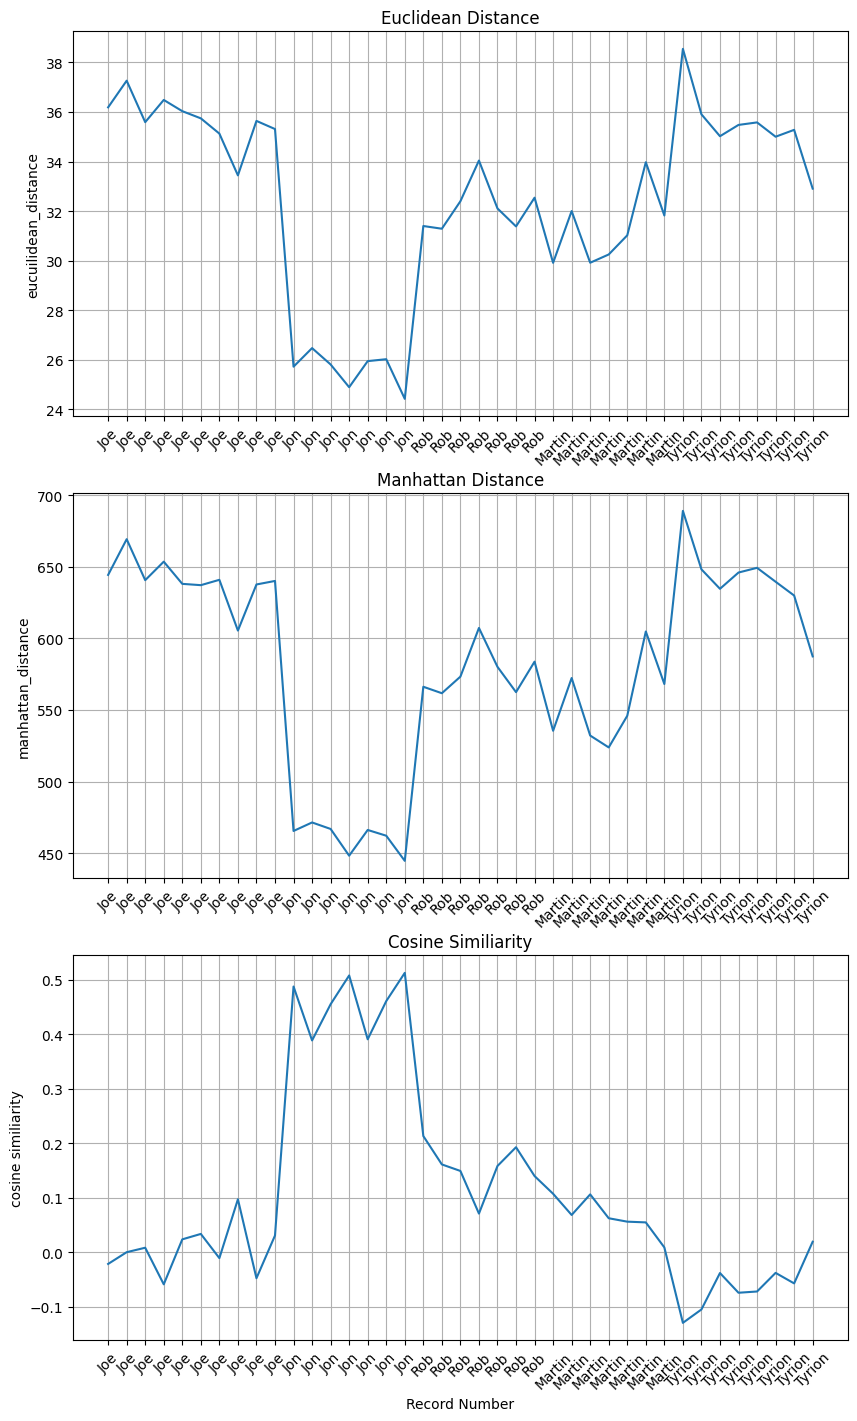

In [26]:
plt.figure(figsize=(10,17))
plt.subplot(3,1,1)
plt.plot(data_search["euclidean"])
plt.grid()
plt.title("Euclidean Distance")
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.ylabel("eucuilidean_distance")

plt.subplot(3,1,2)
plt.plot(data_search["manhattan"])
plt.grid()
plt.title("Manhattan Distance")
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.ylabel("manhattan_distance")

plt.subplot(3,1,3)
plt.plot(data_search["cosine"])
plt.grid()
plt.title("Cosine Similiarity")
plt.xticks(ticks=range(len(data_search)), labels=data_search["name"], rotation=45)
plt.xlabel("Record Number")
plt.ylabel("cosine similiarity")
plt.show()

In [27]:
d_ec_optimal = 28

In [28]:
data_filter = data_search.query(f"euclidean < {d_ec_optimal}")
data_filter.reset_index(drop=True, inplace=True)

if len(data_filter) > 0:
    argmin = data_filter["euclidean"].argmin()
    name, role = data_filter.loc[argmin][["name", "role"]]

else:
    name = "Unknown"
    role = "Unknown"

In [29]:
print(name, role)

Jon Student


In [30]:
cos_opt = 0.5

In [37]:
data_filter = data_search.query(f"cosine > {cos_opt}")
data_filter.reset_index(drop=True, inplace=True)

if len(data_filter) > 0:
    argmax = data_filter["cosine"].argmax()
    name, role = data_filter.loc[argmax][["name", "role"]]

else:
    name = "Unknown"
    role = "Unknown"

In [38]:
data_filter

,name,role,embedding,euclidean,manhattan,cosine
0,Jon,Student,"[-1.0071808, 0.13896942, 1.2490358, -0.4198979...",24.887394,448.163667,0.508002
1,Jon,Student,"[0.85585713, -0.9694588, 0.92706996, 1.0691051...",24.417437,444.554829,0.512781


In [33]:
print(name, role)

Jon Student


In [9]:
def ml_search_algorithm(data_frame, feature_column, test_vector, thresh = 0.5, nr=["name", "role"]):
    
    data_frame = data_frame.copy()
    X_list =data_frame[feature_column].tolist()
    x = np.asarray(X_list)

    similarity = pairwise.cosine_similarity(x, test_vector.reshape(1,-1))
    similar_arr = np.array(similarity).flatten()
    data_frame["cosine"] = similar_arr

    data_filter = data_frame.query(f"cosine >={thresh}")
    data_filter.reset_index(drop=True, inplace=True)
    if len(data_filter) > 0:
        argmax = data_filter["cosine"].argmax()
        person_name, person_role = data_filter.loc[argmax][nr]
    else:
        person_name = "Unknown"
        person_role = "Unknown"

    return person_name, person_role

In [47]:
test_img = cv2.imread("./test_images/group.jpg")
cv2.imshow("test", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
results = app.get(test_img)
test_copy = test_img.copy()

for res in results:
    x1, y1, x2, y2 = res["bbox"].astype(int)
    embeddings = res["embedding"]

    name, role = ml_search_algorithm(df, "embedding", test_vector=embeddings)

    if name == "Unknown":
        color = (0,0,255)
    else:
        color = (0,255,0)

    cv2.rectangle(test_copy, (x1,y1), (x2,y2), color, 1)
    cv2.putText(test_copy, name, (x1,y1-2), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)

cv2.imshow("test", test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
df

,name,role,embedding
0,Joe,Student,"[0.7433794, -0.52599597, 0.63288444, -1.241965..."
1,Joe,Student,"[-0.6705178, -1.0788858, -1.156904, -1.6057901..."
2,Joe,Student,"[-0.14062944, -1.3130106, 0.66264147, 0.053164..."
3,Joe,Student,"[-1.1262792, -1.1930163, -0.5926257, -0.551641..."
4,Joe,Student,"[0.25712642, -1.267541, 0.084139764, -0.411764..."
5,Joe,Student,"[-2.0053103, -0.7248199, 2.7564719, -1.7607996..."
6,Joe,Student,"[0.16668518, -1.7802274, -0.14556298, -2.56176..."
7,Joe,Student,"[-2.1301966, -1.0258768, -0.4972496, -1.821450..."
8,Joe,Student,"[-0.6874978, -1.3496385, -0.22669765, -1.98991..."
9,Joe,Student,"[-1.7451499, -1.6675487, 0.10826075, -0.439916..."


In [49]:
df_compressed = df.groupby(["name", "role"]).mean()
df_compressed.reset_index(inplace=True)
df_compressed

,name,role,embedding
0,Joe,Student,"[-0.73383904, -1.1926562, 0.16253585, -1.23318..."
1,Jon,Student,"[0.013050548, -0.28796571, 0.49172014, 0.22333..."
2,Martin,Teacher,"[0.4679354, -0.67061454, 0.07022456, -0.941410..."
3,Rob,Student,"[-1.1936102, 0.09637058, 0.1618901, -0.2628968..."
4,Tyrion,Teacher,"[-0.57296205, -0.48193663, -0.5918181, -0.2621..."


In [46]:
ml_search_algorithm(df_compressed, "embedding", embeddings)

('Unknown', 'Unknown')

In [50]:
results = app.get(test_img)
test_copy = test_img.copy()

for res in results:
    x1, y1, x2, y2 = res["bbox"].astype(int)
    embeddings = res["embedding"]

    name, role = ml_search_algorithm(df_compressed, "embedding", test_vector=embeddings)

    if name == "Unknown":
        color = (0,0,255)
    else:
        color = (0,255,0)

    cv2.rectangle(test_copy, (x1,y1), (x2,y2), color, 1)
    cv2.putText(test_copy, name, (x1,y1-2), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)

cv2.imshow("test", test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
df_compressed

,name,role,embedding
0,Joe,Student,"[-0.73383904, -1.1926562, 0.16253585, -1.23318..."
1,Jon,Student,"[0.013050548, -0.28796571, 0.49172014, 0.22333..."
2,Martin,Teacher,"[0.4679354, -0.67061454, 0.07022456, -0.941410..."
3,Rob,Student,"[-1.1936102, 0.09637058, 0.1618901, -0.2628968..."
4,Tyrion,Teacher,"[-0.57296205, -0.48193663, -0.5918181, -0.2621..."


In [58]:
x_values = df_compressed.values
col_names = np.array(df_compressed.columns)

In [60]:
col_names, x_values

(array(['name', 'role', 'embedding'], dtype=object),
 array([['Joe', 'Student',
         array([-0.73383904, -1.1926562 ,  0.16253585, -1.2331842 , -1.2056078 ,
                 1.4246587 ,  0.12676767,  0.8672677 ,  2.3327632 , -1.6866531 ,
                -1.4974121 ,  0.5575733 ,  0.02753367,  0.8235652 , -2.4880857 ,
                -0.20051603, -0.37315437, -0.4818151 ,  0.88589126,  2.0865817 ,
                 0.6169242 ,  0.15318187,  0.4121096 ,  0.23579016, -0.6030558 ,
                 0.00700516,  0.24056539, -0.10220034,  1.4318129 , -0.53018564,
                 1.9643724 , -0.31678194, -0.14278388, -0.25507742,  0.03597362,
                 0.5241716 ,  0.06184995,  0.51577455, -0.5696997 , -0.07525869,
                 0.17679973, -0.3476495 ,  0.23252186, -1.0385602 , -0.144134  ,
                 0.1050173 , -0.12202599, -0.04052607,  0.9093212 , -0.56257164,
                 1.4910431 , -0.17721896,  0.7929796 , -0.70894444, -1.3021965 ,
                -0.09129665, 

In [61]:
np.savez("data_frame_students_teacher.npz", x_values, col_names)

In [62]:
file_np = np.load("data_frame_students_teacher.npz", allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [66]:
pd.DataFrame(file_np["arr_0"], columns=file_np["arr_1"])

,name,role,embedding
0,Joe,Student,"[-0.73383904, -1.1926562, 0.16253585, -1.23318..."
1,Jon,Student,"[0.013050548, -0.28796571, 0.49172014, 0.22333..."
2,Martin,Teacher,"[0.4679354, -0.67061454, 0.07022456, -0.941410..."
3,Rob,Student,"[-1.1936102, 0.09637058, 0.1618901, -0.2628968..."
4,Tyrion,Teacher,"[-0.57296205, -0.48193663, -0.5918181, -0.2621..."
